# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [17]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import requests
from IPython.display import display
from io import StringIO
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [18]:
# Include parameters in the URL with a requests.get() send to the API
requests.get('https://api.statbank.dk/v1' + '/tableinfo' + "?id=udvstd02&format=JSON").json()

# Pass a dictionary of parameters to requests.get()
params = {'id': 'udvstd02', 'format': 'JSON'}
requests.get('https://api.statbank.dk/v1' + '/tableinfo', params=params).json()

# Add a language parameter 
params = {'table': 'udvstd02', 'format': 'JSON', 'lang':'en'}

#send a post request to the API
requests.post('https://api.statbank.dk/v1' + '/tableinfo', json=params).json()

{'id': 'UDVSTD02',
 'text': 'Exchange students',
 'description': 'Exchange students by sex, exchange, length of residence, education, area and time',
 'unit': 'Number',
 'suppressedDataValue': '0',
 'updated': '2022-05-13T08:00:00',
 'active': True,
 'contacts': [{'name': 'Alexander Erik Friisnæs',
   'phone': '39173616',
   'mail': 'alx@dst.dk'}],
 'documentation': {'id': 'eb12703b-8e95-4c17-b466-9b592ba740bf',
  'url': 'https://www.dst.dk/documentationofstatistics/eb12703b-8e95-4c17-b466-9b592ba740bf'},
 'footnote': {'text': 'For further information: http://www.dst.dk/ext/uddannelse/Uddannelsestabeller',
  'mandatory': False},
 'variables': [{'id': 'KON',
   'text': 'sex',
   'elimination': True,
   'time': False,
   'values': [{'id': '0', 'text': 'Total'},
    {'id': '1', 'text': 'Men'},
    {'id': '2', 'text': 'Women'},
    {'id': '9', 'text': 'Sex not stated'}]},
  {'id': 'UDVEKSLING',
   'text': 'exchange',
   'elimination': True,
   'time': False,
   'values': [{'id': 'TOT', 'te

In [25]:
# To have access to the Statistics Denmark API for the 'UDVSTD02' table
exch = DstApi('UDVSTD02')

# Give a summary of the table
sum = exch.tablesummary(language='en')
display(sum)

Table UDVSTD02: Exchange students by sex, exchange, length of residence, education, area and time
Last update: 2022-05-13T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KON,4,0,Total,9,Sex not stated,False
1,UDVEKSLING,3,TOT,Total,2,Danish students abroad,False
2,OPVAR,6,TOT,Total,999,No information,False
3,UDDANNELSE,48,TOT,Total,H7097,"H7097 Higher education not specified, MASTER",False
4,OMR20,9,TOT,Total,999,No information,False
5,Tid,12,2010,2010,2021,2021,True


In [27]:
# Displaying values for a each variable: 
for variable in sum['variable name']:
    print(variable+':')
    display(exch.variable_levels(variable, language='en'))

KON:


,id,text
0,0,Total
1,1,Men
2,2,Women
3,9,Sex not stated


UDVEKSLING:


,id,text
0,TOT,Total
1,1,Foreign students in Denmark
2,2,Danish students abroad


OPVAR:


,id,text
0,TOT,Total
1,10,0 - 3 months
2,20,4 - 6 months
3,30,7 - 12 months
4,40,More than 12 months
5,999,No information


UDDANNELSE:


,id,text
0,TOT,Total
1,H30,H30 Vocational Education and Training (VET)
2,H3055,"H3055 The technology area, mechanical engineer..."
3,H40,H40 Short cycle higher education
4,H4024,"H4024 Media and Communication, SCE"
5,H4030,"H4030 Arts, SCE"
6,H4038,"H4038 Social science, Economics-Mercantile, SCE"
7,H4058,"H4058 Technical educations, SCE"
8,H4075,"H4075 Food, biotechnology and laboratory techn..."
9,H4080,"H4080 Agriculture, nature and environment, SCE"


OMR20:


,id,text
0,TOT,Total
1,100,Nordic countries
2,361,Other European countries
3,371,Africa
4,372,USA/Canada
5,373,Latin America/Caribbean
6,374,Asia
7,375,Australia/New Zealand/Pacific Islands
8,999,No information


Tid:


,id,text
0,2010,2010
1,2011,2011
2,2012,2012
3,2013,2013
4,2014,2014
5,2015,2015
6,2016,2016
7,2017,2017
8,2018,2018
9,2019,2019


In [28]:
# Defining a set of parameters to make requests to API
params = exch._define_base_params(language='en')
params

{'table': 'udvstd02',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KON', 'values': ['*']},
  {'code': 'UDVEKSLING', 'values': ['*']},
  {'code': 'OPVAR', 'values': ['*']},
  {'code': 'UDDANNELSE', 'values': ['*']},
  {'code': 'OMR20', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [30]:
# Clean each variable
variables = params['variables'] 
variables[0]['values'] = ['1', '2']
variables[1]['values'] = ['1']
variables[2]['values'] = ['20', '30', '40']
variables[3]['values'] = ['H6039']
variables[4]['values'] = ['>TOT<=375']
variables[5]['values'] = ['>2017<=2021']
params

{'table': 'udvstd02',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KON', 'values': ['1', '2']},
  {'code': 'UDVEKSLING', 'values': ['1']},
  {'code': 'OPVAR', 'values': ['20', '30', '40']},
  {'code': 'UDDANNELSE', 'values': ['H6039']},
  {'code': 'OMR20', 'values': ['>TOT<=375']},
  {'code': 'Tid', 'values': ['>2017<=2021']}]}

In [31]:
#Loading data
exch_stud = exch.get_data(params=params)

#Renaming variables
exch_stud.rename(columns = {'KON':'gender', 'UDVEKSLING' :'Program', 'OPVAR' : 'Period', 'UDDANNELSE':'Study', 'OMR20' : 'Home_Country', 'TID':'Year'}, inplace=True)


exch_stud.head(90)

,gender,Program,Period,Study,Home_Country,Year,INDHOLD
0,Men,Foreign students in Denmark,4 - 6 months,"H6039 Social Sciences, BACH",Nordic countries,2018,9
1,Men,Foreign students in Denmark,4 - 6 months,"H6039 Social Sciences, BACH",Other European countries,2018,290
2,Men,Foreign students in Denmark,4 - 6 months,"H6039 Social Sciences, BACH",Africa,2018,2
3,Men,Foreign students in Denmark,4 - 6 months,"H6039 Social Sciences, BACH",USA/Canada,2018,79
4,Men,Foreign students in Denmark,4 - 6 months,"H6039 Social Sciences, BACH",Latin America/Caribbean,2018,20
...,...,...,...,...,...,...,...
85,Men,Foreign students in Denmark,7 - 12 months,"H6039 Social Sciences, BACH",Nordic countries,2021,2
86,Men,Foreign students in Denmark,7 - 12 months,"H6039 Social Sciences, BACH",Other European countries,2021,72
87,Men,Foreign students in Denmark,7 - 12 months,"H6039 Social Sciences, BACH",USA/Canada,2021,4
88,Men,Foreign students in Denmark,7 - 12 months,"H6039 Social Sciences, BACH",Latin America/Caribbean,2021,3


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [46]:
import seaborn as sns

def plot_func(data, x_var, y_var, hue_var):
    sns.set(style="whitegrid")
    sns.catplot(data=data, x=x_var, y=y_var, hue=hue_var, kind="bar")
    plt.show()

# assume `exch_stud` is the data set we want to explore
x_var = list(exch_stud.columns)
y_var = ['INDHOLD']
hue_var = list(exch_stud.columns)

# create widgets for the variables we want to explore
x_widget = widgets.Dropdown(options=x_var, value=x_var[0], description='X Variable')
y_widget = widgets.Dropdown(options=y_var, value=y_var[0], description='Y Variable')
hue_widget = widgets.Dropdown(options=hue_var, value=hue_var[0], description='Proportion')

# create the interactive plot
widgets.interact(plot_func, 
    data=widgets.fixed(exch_stud), 
    x_var=x_widget, 
    y_var=y_widget, 
    hue_var=hue_widget
);


interactive(children=(Dropdown(description='X Variable', options=('index', 'gender', 'Program', 'Period', 'Stu…

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

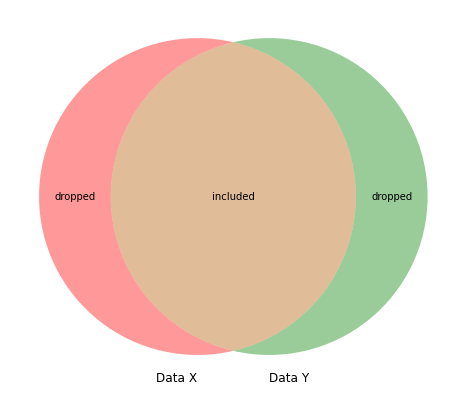

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.